<a href="https://colab.research.google.com/github/efandresena/large-scale-movie-recommendation/blob/colab_developement/mirindraf_mlas_practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 : Practical 1 Data description and analysis

## Downloading the Data Set 32M

In [1]:
# Download data to google drive :
!wget https://files.grouplens.org/datasets/movielens/ml-32m.zip

--2025-11-22 10:50:06--  https://files.grouplens.org/datasets/movielens/ml-32m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238950008 (228M) [application/zip]
Saving to: ‘ml-32m.zip’

ml-32m.zip          100%[===================>] 227.88M  50.6MB/s    in 4.9s    

2025-11-22 10:50:12 (46.2 MB/s) - ‘ml-32m.zip’ saved [238950008/238950008]



In [2]:
# Exctract the zip files to ml
!unzip ml-32m.zip

Archive:  ml-32m.zip
   creating: ml-32m/
  inflating: ml-32m/tags.csv         
  inflating: ml-32m/links.csv        
  inflating: ml-32m/README.txt       
  inflating: ml-32m/checksums.txt    
  inflating: ml-32m/ratings.csv      
  inflating: ml-32m/movies.csv       


In [3]:
# checksum checks :
!cd ml-32m/
!md5sum /content/ml-32m*; cat /content/ml-32m/checksums.txt

md5sum: /content/ml-32m: Is a directory
d472be332d4daa821edc399621853b57  /content/ml-32m.zip
8f033867bcb4e6be8792b21468b4fa6e  links.csv
0df90835c19151f9d819d0822e190797  movies.csv
cf12b74f9ad4b94a011f079e26d4270a  ratings.csv
963bf4fa4de6b8901868fddd3eb54567  tags.csv


## Data Structure Dataset daata by user and by movie

In [4]:
class Dataset():

  def __init__(self):
    self._userId_to_idx = {}
    self._idx_to_userId = []
    self._usr_size = -1
    self._data_by_user = [[]]

    self._movieId_to_idx = {}
    self._idx_to_movieId = []
    self._movie_size = -1
    self._data_by_movie = [[]]

  def is_new_user(self, userId):
    return userId in self._userId_to_idx

  def is_new_movie(self, movieId):
    return movieId in self._movieId_to_idx

  def fetch(self, userId=None , movieId=None, rating_value=None):

    if userId==None:
      self._data_by_movie.append([])
      self._data_by_user.append([])
      return None

    if not self.is_new_user(userId):  # The user is new
      self._idx_to_userId.append(userId)
      self._data_by_user.append([])
      self._usr_size += 1
      self._userId_to_idx[userId] = self._usr_size

    if not self.is_new_movie( movieId): # The movie is new
      self._idx_to_movieId.append(movieId)
      self._data_by_movie.append([])
      self._movie_size += 1
      self._movieId_to_idx[movieId] = self._movie_size

    # update or add data by user : use user position and the movie
    user_pos = self._userId_to_idx[userId]
    movie_pos = self._movieId_to_idx[movieId]
    info_user = (movie_pos, rating_value)
    info_movie = (user_pos, rating_value)


    # Append the info to the correct row
    self._data_by_user[user_pos].append(info_user)
    self._data_by_movie[movie_pos].append(info_movie)

  def get_movie_data(self):
    return self._data_by_movie

  def get_user_data(self):
    return self._data_by_user

  def __repr__(self):
    return f"DoubleIndex(user={self._data_by_user}, movies={self._data_by_movie})"


## Loading the data for exploration

In [5]:
# Read the file
link = "/content/ml-32m/ratings.csv"
dataset = Dataset()
with open(link, 'r') as file:
  next(file)
  for line in file:
    data = line.split(',')
    dataset.fetch(data[0], data[1], data[2])


## Exploratory data analysis

In [6]:
import numpy as np

# Get degree
user_degree = []
movie_degree = []
for user in dataset.get_user_data():
  user_degree.append(len(user))
for movie in dataset.get_movie_data():
  movie_degree.append(len(movie))

unique_m, counts_m = np.unique(movie_degree, return_counts=True)
unique_u, counts_u = np.unique(user_degree, return_counts=True)
len(movie_degree)

84433

## Ploting the rating distrubition

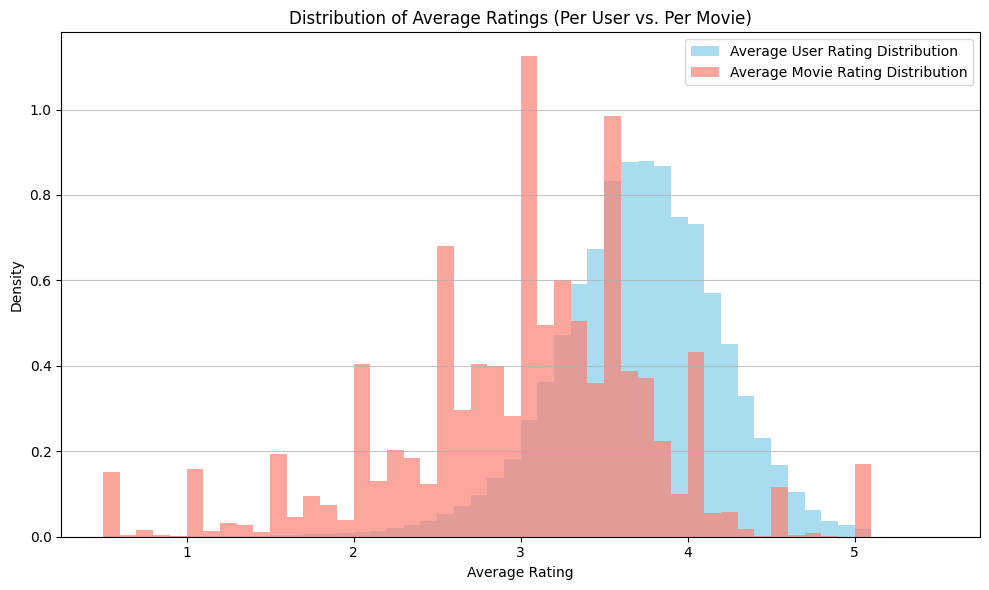

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average rating per user
avg_user_ratings = []
for user_data_list in dataset.get_user_data():
  if user_data_list:
    ratings_for_user = [float(rating_str) for _, rating_str in user_data_list]
    avg_user_ratings.append(sum(ratings_for_user) / len(ratings_for_user))

# Calculate average rating per movie
avg_movie_ratings = []
for movie_data_list in dataset.get_movie_data():
  if movie_data_list:
    ratings_for_movie = [float(rating_str) for _, rating_str in movie_data_list]
    avg_movie_ratings.append(sum(ratings_for_movie) / len(ratings_for_movie))


fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for average user ratings
ax.hist(avg_user_ratings, bins=np.arange(0.5, 5.6, 0.1), color='skyblue', alpha=0.7, label='Average User Rating Distribution', density=True)

# Plot histogram for average movie ratings
ax.hist(avg_movie_ratings, bins=np.arange(0.5, 5.6, 0.1), color='salmon', alpha=0.7, label='Average Movie Rating Distribution', density=True)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Density")
ax.set_title("Distribution of Average Ratings (Per User vs. Per Movie)")
ax.legend()
ax.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.savefig("32M_average_rating_distribution.pdf")
plt.show()

## Ploting the  degree distrubition histogram


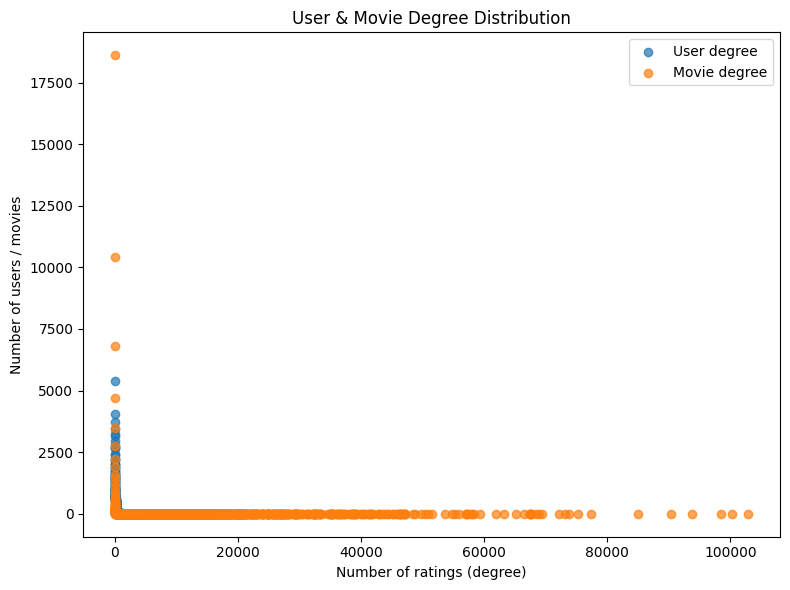

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))  # Single axis

# User degree
ax.scatter(unique_u, counts_u, color='tab:blue', label='User degree', alpha=0.7)

# Movie degree
ax.scatter(unique_m, counts_m, color='tab:orange', label='Movie degree', alpha=0.7)

# Labels and title
ax.set_xlabel("Number of ratings (degree)")
ax.set_ylabel("Number of users / movies")
ax.set_title("User & Movie Degree Distribution")
ax.legend()

plt.tight_layout()
plt.savefig("32M_degree_distribution.pdf")
plt.show()


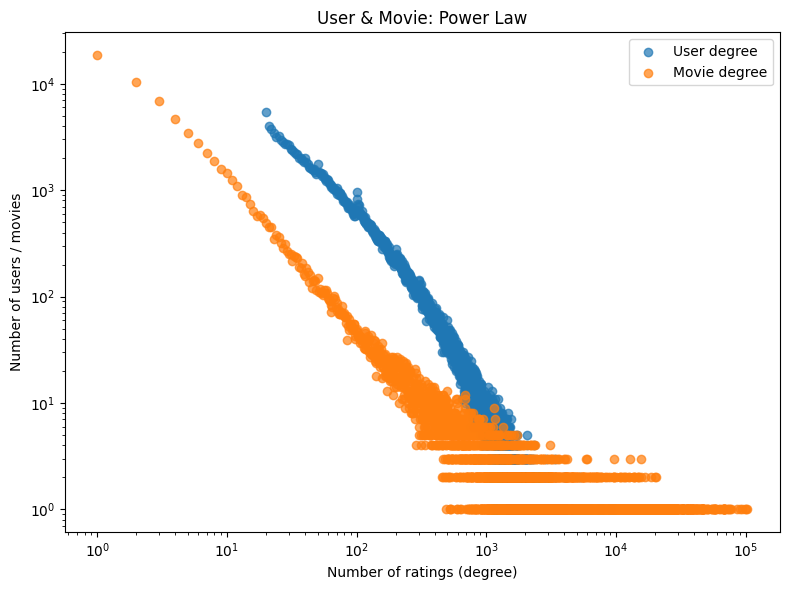

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# User degree
ax.scatter(unique_u, counts_u, color='tab:blue', label='User degree', alpha=0.7)

# Movie degree
ax.scatter(unique_m, counts_m, color='tab:orange', label='Movie degree', alpha=0.7)
# Log–log scale
ax.set_xscale("log")
ax.set_yscale("log")

# Labels and title
ax.set_title('User & Movie: Power Law')
ax.set_xlabel("Number of ratings (degree)")
ax.set_ylabel("Number of users / movies")
ax.legend()

plt.tight_layout()
plt.savefig("32M_power_law.pdf")
plt.show()

### Saving the plots

In [15]:
import os

# Define the target directory
target_dir = '/content/drive/MyDrive/BLOC#3/ML_at_Large_Scale/EDA_32M_Baby_datastructure'

# Create the directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# List of PDF files to copy
pdfs_to_copy = [
    '32M_average_rating_distribution.pdf'
]

# Copy each PDF file to the target directory
for pdf_file in pdfs_to_copy:
    source_path = f'/content/{pdf_file}'
    destination_path = f'{target_dir}/{pdf_file}'
    # Use cp command to overwrite if files exist
    !cp "{source_path}" "{destination_path}"
    print(f'Copied {pdf_file} to {target_dir}')

print(f'All specified PDF files have been saved to: {target_dir}')

Copied 32M_average_rating_distribution.pdf to /content/drive/MyDrive/BLOC#3/ML_at_Large_Scale/EDA_32M_Baby_datastructure
All specified PDF files have been saved to: /content/drive/MyDrive/BLOC#3/ML_at_Large_Scale/EDA_32M_Baby_datastructure
